In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
# from linearmodels.panel.data import PanelData
# from linearmodels.panel import PanelOLS, PooledOLS, RandomEffects, compare
import matplotlib.pyplot as plt
import pyblp

In [4]:
save=0
product_data=pd.read_csv("../../data/merged/len3_ndb_agg_blp_imputed_lags.csv",encoding="shift-jis",index_col=0)
product_data["market_ids"]=product_data["薬効分類"].astype(int).astype(str)+"-"+product_data["year"].astype(int).astype(str)
product_data["generic_share_q"].fillna(0,inplace=True)
product_data["generic_share_r"].fillna(0,inplace=True)
product_data["lag_sum_quantity"]=np.log(product_data["lag_sum_quantity"]+0.001)
product_data["otc_dom"]=np.log(product_data["otc_dom"]+0.001)
product_data.rename(columns={"薬価":"prices","r_share":"shares",
                    # "elasped_0":"demand_instruments0",
                    # "elasped_1":"demand_instruments1",
                    # 'elasped_2': 'demand_instruments2',
                    # 'elasped_3': 'demand_instruments3',
                    # 'elasped_4': 'demand_instruments4',
                    # 'elasped_5': 'demand_instruments5',
                    # 'elasped_6': 'demand_instruments6',
                    # 'elasped_7': 'demand_instruments7',
                    # 'elasped_8': 'demand_instruments8',
                    # 'elasped_9': 'demand_instruments9',
                    # "generic_per":"demand_instruments4",
                    # "mean_price":"demand_instruments10",
                    # "generic_share_q":"demand_instruments7",
                    "lag_mean_price":"demand_instruments0",
                    "lag_sum_quantity":"demand_instruments1",
                    "generic_share_r":"demand_instruments2",
                    "otc_dom":"demand_instruments3",
                    },inplace=True)
product_data=product_data.loc[product_data["shares"]>0]
# data["shares"]=data["r_share"]
product_data.head()

,薬効分類,薬効分類名称,医薬品コード,医薬品名,薬価基準収載医薬品コード,prices,後発品区分,総計,year,in_hospital,...,id_449.0,id_625.0,id_629.0,id_799.0,q_share,shares,generic_share_q,demand_instruments2,y_sq,market_ids
0,114.0,解熱鎮痛消炎剤,620007096.0,ボルタレン錠２５ｍｇ,1147002F1560,13.1,0.0,2.489539e+07,2014.0,1,...,0.0,0.0,0.0,0.0,0.007258,0.002068,0.236142,0.053889,4056196.0,114-2014
1,114.0,解熱鎮痛消炎剤,620007095.0,ボルタレンＳＲカプセル３７．５ｍｇ,1147002N1174,23.2,0.0,1.024590e+07,2014.0,1,...,0.0,0.0,0.0,0.0,0.002987,0.001507,0.236142,0.053889,4056196.0,114-2014
2,114.0,解熱鎮痛消炎剤,620007096.0,ボルタレン錠２５ｍｇ,1147002F1560,13.1,0.0,5.025912e+07,2014.0,0,...,0.0,0.0,0.0,0.0,0.014653,0.004175,0.236142,0.053889,4056196.0,114-2014
3,114.0,解熱鎮痛消炎剤,620007095.0,ボルタレンＳＲカプセル３７．５ｍｇ,1147002N1174,23.2,0.0,2.742935e+07,2014.0,0,...,0.0,0.0,0.0,0.0,0.007997,0.004036,0.236142,0.053889,4056196.0,114-2014
4,114.0,解熱鎮痛消炎剤,661140081.0,ボルタレンサポ５０ｍｇ,1147700J3084,63.1,0.0,5.339043e+06,2014.0,1,...,0.0,0.0,0.0,0.0,0.001557,0.002136,0.236142,0.053889,4056196.0,114-2014


In [5]:
# product_data["demand_instruments12"].isna().sum()
# product_data["lag_sum_quantity"].isna().sum()

In [6]:
logit_formulation = pyblp.Formulation('prices+oral+in_hospital+後発品区分', absorb='C(薬効分類)+C(year)')
logit_formulation

prices + oral + in_hospital + 後発品区分 + Absorb[C(薬効分類)] + Absorb[C(year)]

In [7]:
# product_data["shares"]-=1e-10
problem = pyblp.Problem(logit_formulation, product_data)
problem

Initializing the problem ...
Absorbing demand-side fixed effects ...
Initialized the problem after 00:00:00.

Dimensions:
 T     N     K1    MD    ED 
---  -----  ----  ----  ----
200  25798   4     7     2  

Formulations:
     Column Indices:          0      1         2         3  
--------------------------  ------  ----  -----------  -----
X1: Linear Characteristics  prices  oral  in_hospital  後発品区分


Dimensions:
 T     N     K1    MD    ED 
---  -----  ----  ----  ----
200  25798   4     7     2  

Formulations:
     Column Indices:          0      1         2         3  
--------------------------  ------  ----  -----------  -----
X1: Linear Characteristics  prices  oral  in_hospital  後発品区分

In [8]:
logit_results = problem.solve()
logit_results

Solving the problem ...
Updating the weighting matrix ...
Computed results after 00:00:00.

Problem Results Summary:
GMM     Objective    Clipped  Weighting Matrix
Step      Value      Shares   Condition Number
----  -------------  -------  ----------------
 1    +4.503131E+04     0      +1.860120E+07  

Estimating standard errors ...
Computed results after 00:00:00.

Problem Results Summary:
GMM     Objective    Clipped  Weighting Matrix  Covariance Matrix
Step      Value      Shares   Condition Number  Condition Number 
----  -------------  -------  ----------------  -----------------
 2    +3.004951E+02     0      +2.156652E+08      +3.712969E+07  

Cumulative Statistics:
Computation   Objective 
   Time      Evaluations
-----------  -----------
 00:00:00         2     

Beta Estimates (Robust SEs in Parentheses):
    prices            oral          in_hospital         後発品区分     
---------------  ---------------  ---------------  ---------------
 -2.722553E-03    +1.556678E+00    +4

Problem Results Summary:
GMM     Objective    Clipped  Weighting Matrix  Covariance Matrix
Step      Value      Shares   Condition Number  Condition Number 
----  -------------  -------  ----------------  -----------------
 2    +3.004951E+02     0      +2.156652E+08      +3.712969E+07  

Cumulative Statistics:
Computation   Objective 
   Time      Evaluations
-----------  -----------
 00:00:00         2     

Beta Estimates (Robust SEs in Parentheses):
    prices            oral          in_hospital         後発品区分     
---------------  ---------------  ---------------  ---------------
 -2.722553E-03    +1.556678E+00    +4.056351E-01    -3.224037E+00 
(+1.823582E-03)  (+1.357477E-01)  (+7.633175E-02)  (+9.744334E-01)

In [9]:
import datetime

# Get the current date and time
current_time = datetime.datetime.now()

# Format the time as a string
time_string = current_time.strftime("%Y-%m-%d_%H-%M-%S")
if save:
    logit_results.to_pickle(f"./results/MNL_len3_{time_string}.pkl")

In [10]:
# how to load pickle
# import pickle
# with open("./results/logit_blp_len3.pkl", "rb") as f:
#     example = pickle.load(f)
# example

In [11]:
elasticities = logit_results.compute_elasticities()

Computing elasticities with respect to prices ...
Finished after 00:00:00.



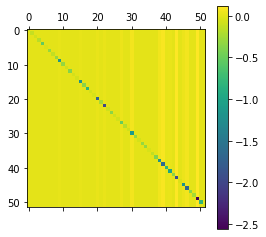

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
single_market = product_data['market_ids'] == '131-2014'
K=sum(single_market)
plt.colorbar(plt.matshow(elasticities[single_market][:,:K]))

In [13]:
elasticities[single_market][:,:K]

array([[-1.24806610e-01,  6.46284929e-04,  3.87333324e-04, ...,
         1.14714901e-01,  8.73195123e-03,  5.21714615e-05],
       [ 1.58574801e-04, -1.24318900e-01,  3.87333324e-04, ...,
         1.14714901e-01,  8.73195123e-03,  5.21714615e-05],
       [ 1.58574801e-04,  6.46284929e-04, -7.33938543e-02, ...,
         1.14714901e-01,  8.73195123e-03,  5.21714615e-05],
       ...,
       [ 1.58574801e-04,  6.46284929e-04,  3.87333324e-04, ...,
        -2.56754436e+00,  8.73195123e-03,  5.21714615e-05],
       [ 1.58574801e-04,  6.46284929e-04,  3.87333324e-04, ...,
         1.14714901e-01, -8.00138560e-01,  5.21714615e-05],
       [ 1.58574801e-04,  6.46284929e-04,  3.87333324e-04, ...,
         1.14714901e-01,  8.73195123e-03, -6.25665487e-02]])

Computing diversion ratios with respect to prices ...
Finished after 00:00:00.



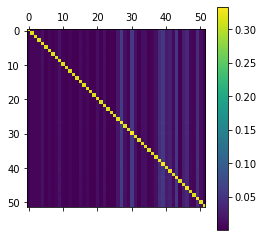

In [16]:
diversions = logit_results.compute_diversion_ratios()
plt.colorbar(plt.matshow(diversions[single_market][:,:K]))